## Stocks & Sentiments: Is it really doable?

Let's see if sentiment analysis really translate into stocks going UP or DOWN.

For this project, I have scrapped news data from wallmine.com news fin. news aggregator using selenium and BS4. The news articles were all relevant to Apple between the dates 2020-07-14 and 2020-09-29

The analysis part is from Lucas Liew https://algotrading101.com/learn/sentiment-analysis-python-guide/. 

The datasource used in this worksheet is entirely different from the one used in above analysis

### 1.1 Data Preparation: News

In [1]:
# Importing libraries

import pandas as pd 

In [2]:
# Loading scrapped data from CSV, mined from wallmine.com

df_all_news = pd.read_csv('all_news.csv')
df_all_news.head()

,id,symbol,headline,summary,date_time
0,1,AAPL,ESG Investors Will Love These 3 Stocks,"Environmental, social, and governance (ESG) in...",10/11/2020 6:00
1,2,AAPL,Stock-Split Fever Cools as Stock Markets Sink ...,Investors didn't react to a stock split announ...,9/29/2020 17:38
2,3,AAPL,"Apple Inc. stock falls Tuesday, underperforms ...",COMPANY CLOSE UPDATES Terrence Horan Shares o...,9/29/2020 16:25
3,4,AAPL,Apple Accused of Delaying Masimo Legal Fight t...,(Bloomberg) -- Apple Inc. is trying to delay a...,9/29/2020 13:20
4,5,AAPL,25 Most Used Illegal Drugs in America,In this article we will take a look at the top...,9/29/2020 13:03


In [3]:
len(df_all_news)

1260

In [4]:
# Setting id column as index

df_all_news.set_index('id', inplace = True)
df_all_news.head()

,symbol,headline,summary,date_time
id,,,,
1,AAPL,ESG Investors Will Love These 3 Stocks,"Environmental, social, and governance (ESG) in...",10/11/2020 6:00
2,AAPL,Stock-Split Fever Cools as Stock Markets Sink ...,Investors didn't react to a stock split announ...,9/29/2020 17:38
3,AAPL,"Apple Inc. stock falls Tuesday, underperforms ...",COMPANY CLOSE UPDATES Terrence Horan Shares o...,9/29/2020 16:25
4,AAPL,Apple Accused of Delaying Masimo Legal Fight t...,(Bloomberg) -- Apple Inc. is trying to delay a...,9/29/2020 13:20
5,AAPL,25 Most Used Illegal Drugs in America,In this article we will take a look at the top...,9/29/2020 13:03


In [5]:
# Checking for NULL values

df_all_news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1260 entries, 1 to 1260
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   symbol     1260 non-null   object
 1   headline   1260 non-null   object
 2   summary    1260 non-null   object
 3   date_time  1260 non-null   object
dtypes: object(4)
memory usage: 49.2+ KB


In [6]:
# Removing news which does not contain mentioned on Apple or AAPL.

searchfor = ['apple', 'aapl', 'Apple', 'APPLE', 'AAPL']
df_all_news = df_all_news[df_all_news.summary.str.contains('|'.join(searchfor))]

In [7]:
len(df_all_news)

684

In [8]:
# Changing data types for headline, summary, and date_time columns. 

# Converted datetime to date only column because we have multiple news stories in a single day, this will become relevant moving forward and I will explain why. 

df_all_news[['headline', 'summary']] = df_all_news[['headline', 'summary']].astype('string')
df_all_news['date_time'] = pd.to_datetime(df_all_news['date_time'], format = '%m/%d/%Y %H:%M')
df_all_news['date_time'] = df_all_news['date_time'].dt.date

In [9]:
# Let's look at out data after conversions

df_all_news.head()

,symbol,headline,summary,date_time
id,,,,
3,AAPL,"Apple Inc. stock falls Tuesday, underperforms ...",COMPANY CLOSE UPDATES Terrence Horan Shares o...,2020-09-29
4,AAPL,Apple Accused of Delaying Masimo Legal Fight t...,(Bloomberg) -- Apple Inc. is trying to delay a...,2020-09-29
6,AAPL,Apple Inc. -- Moody's announces completion of ...,Announcement of Periodic Review: Moody's annou...,2020-09-29
13,AAPL,Judge Recommends Jury Trial in Epic vs. Apple ...,Sep.28 -- The federal judge overseeing Epic Ga...,2020-09-28
14,AAPL,"Apple Inc. stock rises Monday, outperforms market",COMPANY CLOSE UPDATES Terrence Horan Shares o...,2020-09-28


### 1.2 Data Preparation: Stock Data

Pur stock data will be from Yahoo Finance from the same start and end date, for which we have news data

In [10]:
# Prepping for getting stock data for AAPL

min_date = min(df_all_news.date_time)
max_date = max(df_all_news.date_time)

print('Start date is', min_date, 'and end date is', max_date)

Start date is 2020-07-14 and end date is 2020-09-29


In [11]:
# Importing libraries for Yahoo Finance.

import yfinance as yf

# Querying for AAPL from min and max dates

df_aapl_data = yf.download("AAPL", start= min_date, end=max_date)

[*********************100%***********************]  1 of 1 completed


In [12]:
df_aapl_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-13,97.264999,99.955002,95.257500,95.477501,95.305664,191649200
2020-07-14,94.839996,97.254997,93.877502,97.057503,96.882820,170989200
2020-07-15,98.989998,99.247498,96.489998,97.724998,97.549118,153198000
2020-07-16,96.562500,97.404999,95.904999,96.522499,96.348778,110577600
2020-07-17,96.987503,97.147499,95.839996,96.327499,96.154129,92186800


In [13]:
# resetting index column as default dataframe index was set at Date. This is for converting the datatype of date column

df_aapl_data.reset_index(level=0, inplace=True)

In [14]:
df_aapl_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-07-13,97.264999,99.955002,95.257500,95.477501,95.305664,191649200
1,2020-07-14,94.839996,97.254997,93.877502,97.057503,96.882820,170989200
2,2020-07-15,98.989998,99.247498,96.489998,97.724998,97.549118,153198000
3,2020-07-16,96.562500,97.404999,95.904999,96.522499,96.348778,110577600
4,2020-07-17,96.987503,97.147499,95.839996,96.327499,96.154129,92186800


In [15]:
# Converting date datatype to datetime type

df_aapl_data['Date'] = df_aapl_data['Date'].astype('datetime64[ns]') 

In [16]:
# Dropping the non-relevant columns from Yahoo Finance dataset

df_aapl_data = df_aapl_data.drop(['Open', 'High','Low','Close','Volume'], axis = 1)

# Setting back Date coloumn as index
df_aapl_data.set_index('Date', inplace=True) 

In [17]:
# Calculating daily return based on adjusted closing price of the stock for the day
# Returns is calculated by dividing today's Adj. Closing by Yesterday's, -1  

df_aapl_data['returns'] = df_aapl_data['Adj Close']/df_aapl_data['Adj Close'].shift(1) - 1

In [18]:
df_aapl_data.head()

,Adj Close,returns
Date,,
2020-07-13,95.305664,NaN
2020-07-14,96.882820,0.016548
2020-07-15,97.549118,0.006877
2020-07-16,96.348778,-0.012305
2020-07-17,96.154129,-0.002020


### 2. Sentiment Analysis

Now that our datasets are prepared, lets move forward with sentiment analysis. 

For this purpose, we are using VADER (Valence Aware Dictionary and sEntiment Reasoner)

We have a headline and a news summary. We will perform SA for both and then retrieve average for overall sentiment score.

In [19]:
# Importing libraries for sentiment analysis

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

In [20]:
# Running SA score on headline

headline_results = []

for idx in df_all_news.index:
    score = SIA().polarity_scores(df_all_news['headline'][idx])
    score['headline'] = df_all_news['headline'][idx]
    score['id'] = idx
    headline_results.append(score)

# Analysis preview
headline_results[0:3]

[{'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0,
  'compound': 0.0,
  'headline': 'Apple Inc. stock falls Tuesday, underperforms market',
  'id': 3},
 {'neg': 0.287,
  'neu': 0.419,
  'pos': 0.293,
  'compound': 0.0258,
  'headline': 'Apple Accused of Delaying Masimo Legal Fight to Gain Watch Sales',
  'id': 4},
 {'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0,
  'compound': 0.0,
  'headline': "Apple Inc. -- Moody's announces completion of a periodic review of ratings of Apple Inc.",
  'id': 6}]

In [21]:
# Running SA score on summary

summary_results = []

for idx in df_all_news.index:
    score = SIA().polarity_scores(df_all_news['headline'][idx])
    score['summary'] = df_all_news['summary'][idx]
    score['id'] = idx
    summary_results.append(score)

# Analysis preview
summary_results[0:3]

[{'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0,
  'compound': 0.0,
  'summary': 'COMPANY CLOSE UPDATES  Terrence Horan Shares of Apple Inc. AAPL dropped 0.76% to $114.09 Tuesday, on what proved to be an all-around rough trading session for the stock market, with the NASDAQ Composite Index COMP falling 0.\n',
  'id': 3},
 {'neg': 0.287,
  'neu': 0.419,
  'pos': 0.293,
  'compound': 0.0258,
  'summary': '(Bloomberg) -- Apple Inc. is trying to delay a legal fight over allegedly stolen blood-oxygen monitoring technology in its latest watch so it can gain a more dominant share of the smartwatch market, medical-sensor maker Masimo Corp. said in a court filing late Monday.Blood-oxygen monitoring is a key feature of the latest Apple Watch Series 6 announced on Sept. 15. Masimo and its spinoff Cercacor Laboratories Inc. had sued in January, accusing Apple of promising a working relationship only to steal secret information and hire away key employees, including Cercacor’s former chief technology offi

In [22]:
# Merging the findings into master dataset

df_all_news['headline_score'] = pd.DataFrame(headline_results)['compound']
df_all_news['summary_score'] = pd.DataFrame(summary_results)['compound']

In [23]:
# Averaging compound score based on headline and summary and dropping individual columns

df_all_news['score'] = (df_all_news.headline_score + df_all_news.summary_score) / 2
df_all_news = df_all_news.drop(['headline_score','summary_score'], axis=1)

In [24]:
# Previewing master dataset with SA score from VADER

df_all_news.head(10)

,symbol,headline,summary,date_time,score
id,,,,,
3,AAPL,"Apple Inc. stock falls Tuesday, underperforms ...",COMPANY CLOSE UPDATES Terrence Horan Shares o...,2020-09-29,-0.1779
4,AAPL,Apple Accused of Delaying Masimo Legal Fight t...,(Bloomberg) -- Apple Inc. is trying to delay a...,2020-09-29,0.0000
6,AAPL,Apple Inc. -- Moody's announces completion of ...,Announcement of Periodic Review: Moody's annou...,2020-09-29,0.0000
13,AAPL,Judge Recommends Jury Trial in Epic vs. Apple ...,Sep.28 -- The federal judge overseeing Epic Ga...,2020-09-28,-0.1406
14,AAPL,"Apple Inc. stock rises Monday, outperforms market",COMPANY CLOSE UPDATES Terrence Horan Shares o...,2020-09-28,0.5106
15,AAPL,Dow Jones Leads Major Indexes As Bulls Charge;...,The Dow Jones led the major indexes as a bull ...,2020-09-28,0.5574
16,AAPL,"U.S. judge urges Apple, Epic Games to put anti...",A federal judge in California on Monday urged ...,2020-09-28,0.5574
18,AAPL,Google to Make It Easier to Use More App Store...,(Bloomberg) -- Alphabet Inc.’s Google is updat...,2020-09-28,0.0000
19,AAPL,"Dow Jones Surges 500 Points, As Apple, Tesla J...",The major stock indexes were sharply higher ea...,2020-09-28,-0.0516


### 3. Correlating Returns & SA Score

In [25]:
# Going back to the point where we converted datetime stamp to date stamp for news articles, 
# the rationale behind was to have a cummulative SA score for any given day so it can be 
# correlated with daily stock returns 

# Here we are creating a new dataframe containing sum of scores for each date, because we had 
# multiple SA score for each day due to multiple news articles in a single day

df_all_news_compound = df_all_news.groupby(['date_time']).sum().round(4)
df_all_news_compound

,score
date_time,
2020-07-14,0.0000
2020-07-15,0.0000
2020-07-16,0.0000
2020-07-17,0.0000
2020-07-20,0.0000
...,...
2020-09-24,0.0185
2020-09-25,-0.2853
2020-09-27,1.1148


In [26]:
# Creating score_1 containing the score for the previous day.
# This is because we want to compare today's return with previous day news SA score

df_all_news_compound['score_1'] = df_all_news_compound.shift(1)

In [27]:
df_all_news_compound

,score,score_1
date_time,,
2020-07-14,0.0000,NaN
2020-07-15,0.0000,0.0000
2020-07-16,0.0000,0.0000
2020-07-17,0.0000,0.0000
2020-07-20,0.0000,0.0000
...,...,...
2020-09-24,0.0185,-1.4001
2020-09-25,-0.2853,0.0185
2020-09-27,1.1148,-0.2853


In [28]:
# Let' merge the returns with score_1 into new dataset

df_merge_stock_news = pd.merge(df_aapl_data[['returns']], 
                               df_all_news_compound[['score_1']], 
                               left_index=True, 
                               right_index=True, 
                               how='left')

In [29]:
df_merge_stock_news.sort_values('score_1')

,returns,score_1
Date,,
2020-09-16,-0.029514,-2.0499
2020-09-17,-0.015964,-1.5785
2020-09-24,0.010269,-1.4001
2020-09-18,-0.031720,-1.1761
2020-08-28,-0.001620,-0.6407
2020-08-25,-0.008204,-0.5651
2020-09-09,0.039887,-0.4490
2020-09-22,0.015716,-0.3217
2020-09-14,0.030000,-0.1779


In [30]:
# Filling NaN with 0. NaN score means there is no news for that day. 

df_merge_stock_news.fillna(0, inplace=True) 
df_merge_stock_news.head()

,returns,score_1
Date,,
2020-07-13,0.000000,0.0
2020-07-14,0.016548,0.0
2020-07-15,0.006877,0.0
2020-07-16,-0.012305,0.0
2020-07-17,-0.002020,0.0


In [42]:
# Eliminating 0 scores and only keeping the entries where score is > 0.5 or < -0.5

df_merge_stock_news_2 = df_merge_stock_news[(df_merge_stock_news['score_1'] != 0)]
df_merge_stock_news_2

,returns,score_1
Date,,
2020-08-19,0.001255,-0.0772
2020-08-20,0.022190,2.4270
2020-08-21,0.051532,0.7187
2020-08-24,0.011960,1.0463
2020-08-25,-0.008204,-0.5651
2020-08-26,0.013599,1.0251
2020-08-27,-0.011954,-0.0709
2020-08-28,-0.001620,-0.6407
2020-08-31,0.033912,0.1779


In [43]:
df_merge_stock_news_2['returns'].corr(df_merge_stock_news_2['score_1'])

0.007945312066886373

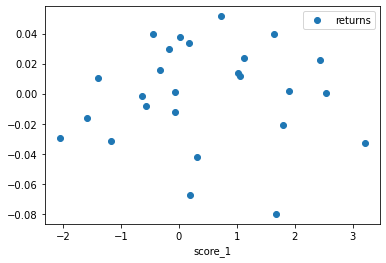

In [44]:
df_merge_stock_news_2.plot(x = 'score_1', y = 'returns', style = 'o')

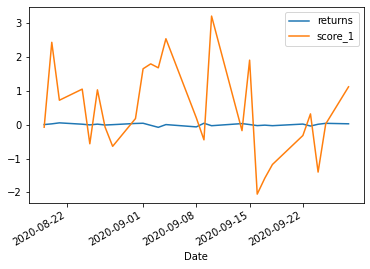

In [39]:
df_merge_stock_news_2.plot()